In [1]:
# Initial imports.
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import graphviz

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import mean_squared_error
from config import aws_user
from config import aws_password
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import balanced_accuracy_score

In [2]:
# Import regression model csv
multiple_linear_regression_df = pd.read_csv("../resources/regression_ml_model/merged_internet_access.csv")

# round to two decimal places in python pandas 
pd.options.display.float_format = '{:.2f}'.format
multiple_linear_regression_df.head()

,ID,population,avg_household_size,level_up_access_pop_percent,sex_total_men,sex_total_women,race_hispanic_or_latino,race_not_hispanic_or_latino,race_american_indian_and_alaska_native,race_asian,...,age_15-19,age_20-24,age_25-34,age_35-44,age_45-54,age_55-59,age_60-64,age_65-74,age_75-84,age_85_and_over
0,0500000US06033-Lake County,64148,2.43,0.88,31879,32269,12830,51318,2090,642,...,3516,3231,6973,6706,8097,5137,5540,8591,3975,1375
1,0500000US06043-Mariposa County,17540,2.13,0.41,8920,8620,1909,15631,390,243,...,804,803,1885,1614,2284,1503,1683,2778,1556,356
2,0500000US06115-Yuba County,75493,2.83,0.76,38468,37025,20990,54503,643,4977,...,4955,5600,11930,9193,8410,4592,4001,5647,2311,1117
3,0500000US06013-Contra Costa County,1133247,2.86,0.98,553701,579546,288101,845146,2376,182135,...,72857,68013,143793,151683,164203,78858,69200,99537,48565,21680
4,0500000US06035-Lassen County,31185,2.23,0.52,20671,10514,5834,25351,847,436,...,1444,3218,6287,4353,3899,1803,1891,2504,1250,403


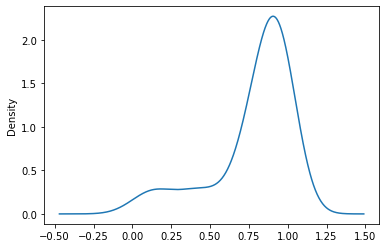

In [3]:
multiple_linear_regression_df['level_up_access_pop_percent'].plot.density()

In [5]:
# usa_internet_access_df.loc[usa_internet_access_df['level_up_access_pop_percent'] < .7] = 0
multiple_linear_regression_df.loc[(multiple_linear_regression_df.level_up_access_pop_percent < .7),'level_up_access_pop_percent']= 0
multiple_linear_regression_df.loc[(multiple_linear_regression_df.level_up_access_pop_percent > .7),'level_up_access_pop_percent']= 1
multiple_linear_regression_df

,ID,population,avg_household_size,level_up_access_pop_percent,sex_total_men,sex_total_women,race_hispanic_or_latino,race_not_hispanic_or_latino,race_american_indian_and_alaska_native,race_asian,...,age_15-19,age_20-24,age_25-34,age_35-44,age_45-54,age_55-59,age_60-64,age_65-74,age_75-84,age_85_and_over
0,0500000US06033-Lake County,64148,2.43,1.00,31879,32269,12830,51318,2090,642,...,3516,3231,6973,6706,8097,5137,5540,8591,3975,1375
1,0500000US06043-Mariposa County,17540,2.13,0.00,8920,8620,1909,15631,390,243,...,804,803,1885,1614,2284,1503,1683,2778,1556,356
2,0500000US06115-Yuba County,75493,2.83,1.00,38468,37025,20990,54503,643,4977,...,4955,5600,11930,9193,8410,4592,4001,5647,2311,1117
3,0500000US06013-Contra Costa County,1133247,2.86,1.00,553701,579546,288101,845146,2376,182135,...,72857,68013,143793,151683,164203,78858,69200,99537,48565,21680
4,0500000US06035-Lassen County,31185,2.23,0.00,20671,10514,5834,25351,847,436,...,1444,3218,6287,4353,3899,1803,1891,2504,1250,403
5,0500000US06083-Santa Barbara County,443738,2.92,1.00,222208,221530,200060,243678,1407,22996,...,37445,49425,58974,50124,49960,25886,24096,35041,19841,9893
6,0500000US06097-Sonoma County,501317,2.60,1.00,245196,256121,132985,368332,2068,19720,...,29922,30140,65417,61766,66429,35686,37573,55520,23956,11621
7,0500000US06025-Imperial County,180216,3.87,1.00,92250,87966,151019,29197,1076,2376,...,13576,14006,26210,21833,20565,9536,8748,12428,6979,3039
8,0500000US06051-Mono County,14174,2.86,1.00,7341,6833,3866,10308,342,336,...,630,1341,2264,1563,1964,1314,907,1385,568,77
9,0500000US06001-Alameda County,1643700,2.81,1.00,807171,836529,369061,1274639,5288,483067,...,93865,103705,271867,244557,224507,106455,93101,126820,60948,28149


In [6]:
# Seperate the features and target
y = multiple_linear_regression_df['level_up_access_pop_percent']
multiple_linear_regression_df.drop(['ID'], axis = 1, inplace = True)
# dropping rows to improve regression model, 18% of rows with >= (-).70 which tell: inverse rows, rows that were "total pop" rows, columns that are similar to other rows
# 1st attempt (overfitted) multiple_linear_regression_df.drop(['race_not_hispanic_or_latino', 'occupation_population_16_and_over_total', 'hh_with_computer_and_internet_total', 'hh_with_income_total', 'family_structure_hh_total'], axis = 1, inplace = True)
# added race not hispanic, two and three or more (covered by other columns), occupation columns (similar to industry and income), hh computer(s) (similar to other columns), hh w/comp(similar to w/internet), with income total (similar to income columns), median income(mean similar and more accurate), family structure total (similiar to similar columns),  employment 16+ (similar to other columns), employment rate(similar to unemployed column) disability <18, 18-64, 65+ (similar to population and age data), 64+ w/disability (similar to 65+ age column)
# multiple_linear_regression_df.drop(['race_not_hispanic_or_latino', 'race_two_or_more_excluding_some_ther_and_three_or_more', 'race_two_or_more_including_some_other', 'occupation_population_16_and_over_total', 'occupation_management_business_science_and_arts', 'occupation_service', 'occupation_sales_and_office', 'occupation_natural_resources_construction_and_maintenance', 'occupation_production_transporation_and_material_moving', 'hh_with_computer', 'hh_with_computer_and_internet_total', 'hh_with_income_total', 'hh_median_income', 'family_structure_hh_total', 'disability_population_under_18', 'disability_population_18-64', 'disability_population_65_and_over', 'disability_64_and_over_with_disability', 'employment_16_and_over_in_labor_force', 'employment_%_unemployment_rate', 'citizenship_native_born', 'citizenship_foreign_born'], axis = 1, inplace = True)
# testing columns: sex( inverse), race not hispanic (inverse or hispanic column and same as other columns (asian, native, etc)), two and three or more (same as two or more), citizenships columns(similar/inverse of race columns)
# multiple_linear_regression_df.drop(['industry_agriculture_forestry_fishing_and_hunting_and_mining', 'industry_construction', 'industry_manufacturing', 'industry_wholesale_trade', 'industry_retail_trade', 'industry_transportation_and_warehousing_and_utilities', 'industry_information', 'industry_finance_and_insurance_real_estate_and_rental_and_leasing', 'industry_professional_scientific_management_administrative_and_waste_management_services', 'industry_educational_services_health_care_and_social_assistance', 'industry_arts_entertainment_recreation_accommodation_and_food_services', 'industry_other_services_except_public_administration', 'industry_public_administration'], axis = 1, inplace = True)
# multiple_linear_regression_df.drop(['sex_total_women', 'race_not_hispanic_or_latino', 'race_two_or_more_excluding_some_ther_and_three_or_more', 'race_two_or_more_including_some_other', 'citizenship_foreign_born'], axis = 1, inplace = True)

In [7]:
multiple_linear_regression_df.drop(['level_up_access_pop_percent'], axis = 1, inplace = True)
x = multiple_linear_regression_df
x

,population,avg_household_size,sex_total_men,sex_total_women,race_hispanic_or_latino,race_not_hispanic_or_latino,race_american_indian_and_alaska_native,race_asian,race_black_or_african_american,race_native_hawaiian_and_other_pacific_islander,...,age_15-19,age_20-24,age_25-34,age_35-44,age_45-54,age_55-59,age_60-64,age_65-74,age_75-84,age_85_and_over
0,64148,2.43,31879,32269,12830,51318,2090,642,1426,30,...,3516,3231,6973,6706,8097,5137,5540,8591,3975,1375
1,17540,2.13,8920,8620,1909,15631,390,243,166,54,...,804,803,1885,1614,2284,1503,1683,2778,1556,356
2,75493,2.83,38468,37025,20990,54503,643,4977,2340,292,...,4955,5600,11930,9193,8410,4592,4001,5647,2311,1117
3,1133247,2.86,553701,579546,288101,845146,2376,182135,93683,5251,...,72857,68013,143793,151683,164203,78858,69200,99537,48565,21680
4,31185,2.23,20671,10514,5834,25351,847,436,2695,205,...,1444,3218,6287,4353,3899,1803,1891,2504,1250,403
5,443738,2.92,222208,221530,200060,243678,1407,22996,7881,482,...,37445,49425,58974,50124,49960,25886,24096,35041,19841,9893
6,501317,2.60,245196,256121,132985,368332,2068,19720,7192,1406,...,29922,30140,65417,61766,66429,35686,37573,55520,23956,11621
7,180216,3.87,92250,87966,151019,29197,1076,2376,3906,307,...,13576,14006,26210,21833,20565,9536,8748,12428,6979,3039
8,14174,2.86,7341,6833,3866,10308,342,336,40,0,...,630,1341,2264,1563,1964,1314,907,1385,568,77
9,1643700,2.81,807171,836529,369061,1274639,5288,483067,172329,13192,...,93865,103705,271867,244557,224507,106455,93101,126820,60948,28149


In [8]:
x = np.round(x, decimals = 0)
x

,population,avg_household_size,sex_total_men,sex_total_women,race_hispanic_or_latino,race_not_hispanic_or_latino,race_american_indian_and_alaska_native,race_asian,race_black_or_african_american,race_native_hawaiian_and_other_pacific_islander,...,age_15-19,age_20-24,age_25-34,age_35-44,age_45-54,age_55-59,age_60-64,age_65-74,age_75-84,age_85_and_over
0,64148,2.00,31879,32269,12830,51318,2090,642,1426,30,...,3516,3231,6973,6706,8097,5137,5540,8591,3975,1375
1,17540,2.00,8920,8620,1909,15631,390,243,166,54,...,804,803,1885,1614,2284,1503,1683,2778,1556,356
2,75493,3.00,38468,37025,20990,54503,643,4977,2340,292,...,4955,5600,11930,9193,8410,4592,4001,5647,2311,1117
3,1133247,3.00,553701,579546,288101,845146,2376,182135,93683,5251,...,72857,68013,143793,151683,164203,78858,69200,99537,48565,21680
4,31185,2.00,20671,10514,5834,25351,847,436,2695,205,...,1444,3218,6287,4353,3899,1803,1891,2504,1250,403
5,443738,3.00,222208,221530,200060,243678,1407,22996,7881,482,...,37445,49425,58974,50124,49960,25886,24096,35041,19841,9893
6,501317,3.00,245196,256121,132985,368332,2068,19720,7192,1406,...,29922,30140,65417,61766,66429,35686,37573,55520,23956,11621
7,180216,4.00,92250,87966,151019,29197,1076,2376,3906,307,...,13576,14006,26210,21833,20565,9536,8748,12428,6979,3039
8,14174,3.00,7341,6833,3866,10308,342,336,40,0,...,630,1341,2264,1563,1964,1314,907,1385,568,77
9,1643700,3.00,807171,836529,369061,1274639,5288,483067,172329,13192,...,93865,103705,271867,244557,224507,106455,93101,126820,60948,28149


In [9]:
corr_df = multiple_linear_regression_df.corr()
corr_df.to_csv("../resources/regression_ml_model/correlation_table.csv")
corr_df.head()

,population,avg_household_size,sex_total_men,sex_total_women,race_hispanic_or_latino,race_not_hispanic_or_latino,race_american_indian_and_alaska_native,race_asian,race_black_or_african_american,race_native_hawaiian_and_other_pacific_islander,...,age_15-19,age_20-24,age_25-34,age_35-44,age_45-54,age_55-59,age_60-64,age_65-74,age_75-84,age_85_and_over
population,1.00,0.22,1.00,1.00,0.98,0.99,0.91,0.93,0.96,0.86,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
avg_household_size,0.22,1.00,0.22,0.22,0.25,0.20,0.21,0.16,0.17,0.20,...,0.25,0.23,0.21,0.21,0.21,0.21,0.21,0.21,0.20,0.19
sex_total_men,1.00,0.22,1.00,1.00,0.98,0.99,0.91,0.93,0.95,0.86,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
sex_total_women,1.00,0.22,1.00,1.00,0.98,0.99,0.91,0.93,0.96,0.86,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
race_hispanic_or_latino,0.98,0.25,0.98,0.98,1.00,0.94,0.89,0.88,0.96,0.79,...,0.99,0.99,0.98,0.98,0.98,0.98,0.98,0.97,0.98,0.97


In [10]:
y

0    1.00
1    0.00
2    1.00
3    1.00
4    0.00
5    1.00
6    1.00
7    1.00
8    1.00
9    1.00
10   1.00
11   1.00
12   1.00
13   0.00
14   1.00
15   1.00
16   1.00
17   0.00
18   1.00
19   1.00
20   1.00
21   1.00
22   1.00
23   1.00
24   0.00
25   1.00
26   1.00
27   0.00
28   1.00
29   0.00
30   1.00
31   1.00
32   1.00
33   1.00
34   1.00
35   1.00
36   1.00
37   1.00
38   0.00
39   1.00
40   0.00
41   1.00
42   1.00
43   0.00
44   1.00
45   1.00
46   1.00
47   1.00
48   1.00
49   1.00
50   0.00
51   1.00
52   1.00
53   1.00
54   0.00
55   1.00
56   1.00
57   1.00
Name: level_up_access_pop_percent, dtype: float64

### Random Forrest Model

In [25]:
# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [26]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [27]:
rfmodel = RandomForestClassifier(n_estimators=60, random_state=1)
rfmodel = rfmodel.fit(X_train_scaled, y_train)
rfmodel
# brf_model = BalancedRandomForestClassifier(n_estimators=128, random_state=21)
# brf_model = brf_model.fit(X_train_scaled, y_train)
# brf_model

RandomForestClassifier(n_estimators=60, random_state=1)

In [28]:
# Calculated the balanced accuracy score
predictions = rfmodel.predict(X_test_scaled)
acc_score = balanced_accuracy_score(y_test, predictions)
acc_score

0.9642857142857143

In [29]:
mse_pred1 = rfmodel.predict(X_test)
mean_squared_error(y_test, mse_pred1)

0.06666666666666667

In [30]:
rfmodel.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=1791095845)

In [31]:
# Calculate feature importance in the Random Forest model.
importances = rfmodel.feature_importances_
importances

array([0.01488834, 0.        , 0.        , 0.01488834, 0.        ,
       0.00176598, 0.0174531 , 0.04291616, 0.00444115, 0.00051663,
       0.08130652, 0.00281046, 0.02057188, 0.        , 0.01021021,
       0.00362233, 0.01401924, 0.00213294, 0.00540462, 0.02801781,
       0.00228675, 0.00454537, 0.        , 0.00176519, 0.00791534,
       0.0231604 , 0.01053986, 0.00175654, 0.03126973, 0.03220244,
       0.        , 0.04520457, 0.        , 0.047474  , 0.        ,
       0.00170635, 0.00980879, 0.01466605, 0.00634728, 0.00495872,
       0.0025217 , 0.01804275, 0.00141383, 0.01348148, 0.01398056,
       0.02829902, 0.04797756, 0.00700454, 0.02049911, 0.006214  ,
       0.        , 0.03168582, 0.        , 0.        , 0.01487317,
       0.        , 0.01488834, 0.00081507, 0.001382  , 0.00314327,
       0.        , 0.        , 0.        , 0.        , 0.00309937,
       0.00153134, 0.        , 0.01648535, 0.02589826, 0.03262725,
       0.        , 0.0122428 , 0.02048712, 0.        , 0.02846

In [32]:
# We can sort the features by their importance.
sorted(zip(rfmodel.feature_importances_, x.columns), reverse=True)

[(0.0813065171078062, 'race_some_other_race'),
 (0.04797755710910953, 'hh_with_income_150000-199999'),
 (0.04747400101502268,
  'industry_educational_services_health_care_and_social_assistance'),
 (0.04520457033388068,
  'industry_finance_and_insurance_real_estate_and_rental_and_leasing'),
 (0.04291616314812347, 'race_asian'),
 (0.03262724832118215, 'disability_18-64_with_disability'),
 (0.032202439137923006,
  'industry_transportation_and_warehousing_and_utilities'),
 (0.03168582375478927, 'family_structure_hh_with_one_or_more_under_18'),
 (0.03126972718734083, 'industry_retail_trade'),
 (0.029986683912521232, 'age_20-24'),
 (0.028465875631430777, 'age_5-9'),
 (0.028299023665225763, 'hh_with_income_100000-149999'),
 (0.02801780557156901,
  'occupation_natural_resources_construction_and_maintenance'),
 (0.025898260538783413, 'disability_under_18_with_disability'),
 (0.023160396597896597, 'industry_construction'),
 (0.021929220434005123, 'age_15-19'),
 (0.020571879509379512,
  'race_two

In [33]:
# Evaluate the model
print(f" Random forest predictive accuracy: {accuracy_score(y_test,predictions):.3f}")

 Random forest predictive accuracy: 0.933


In [34]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,1,0
Actual 1,1,13


In [35]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)

In [36]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1,0
Actual 1,1,13


Accuracy Score : 0.9333333333333333
Classification Report
              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67         1
         1.0       1.00      0.93      0.96        14

    accuracy                           0.93        15
   macro avg       0.75      0.96      0.81        15
weighted avg       0.97      0.93      0.94        15



In [37]:
classification_tree = tree.export_graphviz(rfmodel.estimators_[0], out_file=None, 
                      feature_names= x.columns,  
                      class_names='y',  
                      filled=True)

graph = graphviz.Source(classification_tree)
graph 

IndexError: string index out of range

In [ ]:
classification_tree = tree.export_graphviz(rfmodel.estimators_[1], out_file=None, 
                      feature_names= x.columns,  
                      class_names='y',  
                      filled=True)

graph = graphviz.Source(classification_tree)
graph 